# Konwolucyjne sieci neuronowe i przetwarzanie sekwencji



## Implementacja jednowymiarowej sieci konwolucyjnej

W pakiecie Keras jednowymiarowe sieci konwolucyjne zostały zaimplementowane w postaci warstwy Conv1D. Na wejściu warstwa ta przyjmuje trójwymiarowe tensory o kształcie (próbki, czas, cechy) i zwraca trójwymiarowe tensory o takim samym kształcie. Okno konwolucyjne jest jednowymiarowym oknem poruszającym się wzdłuż osi czasu (osi tensora wejściowego oznaczonej numerem 1).

Zbudujmy prostą jednowymiarową sieć konwolucyjną i spróbujmy użyć jej do analizy sentymentu recenzji wchodzących w skład zbioru IMDB. Przypominam kod importujący i przetwarzający wstępnie dane tego zbioru:

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # Liczba słów traktowanych jako cechy.
max_len = 500  # Ucina recenzje po tej liczbie słów należących do zbioru max_features słów najczęściej występujących w zbiorze.

print('Ładowanie danych...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'sekwencje treningowe')
print(len(x_test), 'sekwencje testowe')

print('Sekwencje (próbki x czas)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('Kształt obiektu input_train:', x_train.shape)
print('Kształt obiektu input_test:', x_test.shape)

Ładowanie danych...
25000 sekwencje treningowe
25000 sekwencje testowe
Sekwencje (próbki x czas)
Kształt obiektu input_train: (25000, 500)
Kształt obiektu input_test: (25000, 500)



Jednowymiarowe sieci konwolucyjne mają taką samą strukturę jak ich dwuwymiarowe odpowiedniki: składają się ze stosu warstw Conv1D i MaxPooling1D, a na ich końcu znajduje się globalna warstwa łącząca lub warstwa spłaszczająca (Flatten) zamieniająca trójwymiarowe obiekty wyjściowe w obiekty dwuwymiarowe, co pozwala na dodanie do modelu klasyfikacji lub regresji przynajmniej jednej warstwy Dense.
Jedną z różnic między tymi typami sieci jest to, że w przypadku jednowymiarowych sieci konwolucyjnych możemy pozwolić sobie na użycie większych okien konwolucji. W przypadku dwuwymiarowej warstwy konwolucji okno konwolucji o wymiarach 3x3 zawiera 3x3 = 9 wektorów cech, a w przypadku warstwy jednowymiarowej konwolucji okno konwolucji o rozmiarze równym 3 składa się tylko z 3 wektorów cech. W związku z tym możemy swobodnie pozwolić sobie na korzystanie z jednowymiarowych okien konwolucji o rozmiarze równym 7 lub 9.

Oto przykładowa jednowymiarowa sieć konwolucyjna przetwarzająca zbiór danych IMDB:

In [8]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))


model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1746997868.462923  106179 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5514 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1746997874.360665  106760 service.cc:148] XLA service 0x7f191801a420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746997874.360767  106760 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2025-05-11 23:11:14.380403: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746997874.486101  106760 cuda_dnn.cc:529] Loaded cuDNN version 90900


 20/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.4991 - loss: 8.0581

I0000 00:00:1746997876.926078  106760 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 145ms/step - acc: 0.4963 - loss: 3.7741 - val_acc: 0.5198 - val_loss: 0.6930
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - acc: 0.5598 - loss: 0.6868 - val_acc: 0.6210 - val_loss: 0.6777
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - acc: 0.6809 - loss: 0.6632 - val_acc: 0.7028 - val_loss: 0.6459
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - acc: 0.7517 - loss: 0.6168 - val_acc: 0.7776 - val_loss: 0.5487
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - acc: 0.8059 - loss: 0.5019 - val_acc: 0.8140 - val_loss: 0.4554
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - acc: 0.8419 - loss: 0.4110 - val_acc: 0.8226 - val_loss: 0.4544
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - acc: 0.8579 - loss: 0.3697 - val_acc: 0.8426 - val_loss: 0.4392
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - acc: 0.8762 - loss: 0.3441 - val_acc: 0.8536 - val_loss: 0.4300
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 98

Dokładność walidacji jest nieco mniejsza od tej, którą uzyskał model sieci LSTM, ale trenowanie bieżącego modelu trwało znacznie szybciej (dotyczy to pracy na układzie CPU, a także układzie GPU). Oczywiście dokładny przyrost prędkości wykonywania obliczeń zależy od konfiguracji sprzętowej. Możemy zapisać ten model, ograniczając czas jego wykonywania do ośmiu epok, a następnie sprawdzić jego działanie na zbiorze testowym. To z pewnością przekonujący dowód na to, że jednowymiarowa sieć konwolucyjna jest szybszą i tańszą alternatywą stosowania sieci rekurencyjnej w przypadku problemu analizy sentymentu na poziomie słów.

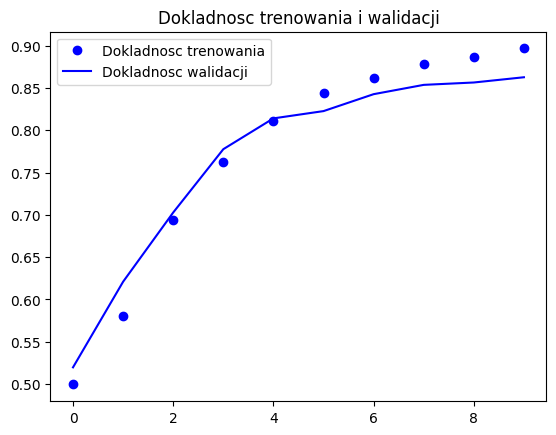

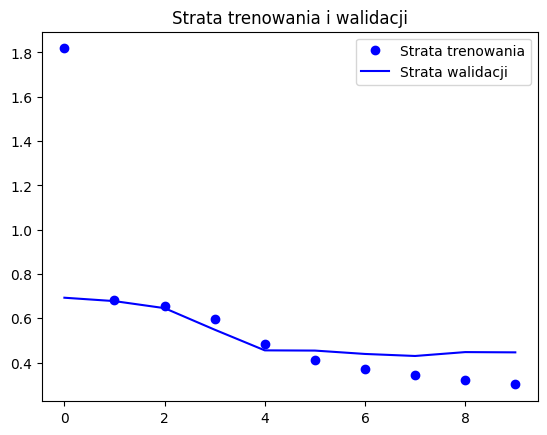

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

## Łączenie sieci konwolucyjnych i rekurencyjnych w celu przetworzenia długich sekwencji


Jednowymiarowe sieci konwolucyjne przetwarzają sekwencje wejściowe w sposób niezależny. W przeciwieństwie do siei rekurencyjnych nie są wrażliwe na kolejność obserwacji (poza skalą lokalną określaną przez rozmiar okna konwolucji). Oczywiście w celu rozpoznana bardziej rozciągniętych prawidłowości możemy utworzyć stos wielu warstw konwolucyjnych i warstw łączących. W ten sposób górne warstwy będą analizować dłuższe fragmenty danych wejściowych, ale jest to słaby sposób na wprowadzenie wrażliwości modelu na kolejność obserwacji. Sprawdźmy w praktyce tę słabość modelu podczas prognozowania temperatury (w tym problemie kolejność jest bardzo ważna dla otrzymania prawidłowych prognoz). W poniższym przykładzie korzystamy ponownie ze zdefiniowanych wcześniej zmiennych loat_data, train_gen, val_gen i val_steps.

In [11]:
# W poniższym przykładzie korzystamy ponownie ze zdefiniowanych
# wcześniej zmiennych loat_data, train_gen, val_gen i val_steps.

import os
import numpy as np

fname = 'jena_climate_2009_2016.csv'

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# Liczba kroków pobierania danych z obiektu val_gen,
# przy której przetworzony zostanie cały walidacyjny zbiór danych.
val_steps = (300000 - 200001 - lookback) // batch_size

# Liczba kroków pobierania danych z obiektu test_gen,
# przy której przetworzony zostanie cały testowy zbiór danych.
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.4541 - val_loss: 0.4352
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3712 - val_loss: 0.4249
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3449 - val_loss: 0.4340
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3254 - val_loss: 0.4484
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3124 - val_loss: 0.4614
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3055 - val_loss: 0.4534
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2947 - val_loss: 0.4620
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.2892 - val_loss: 0.4582
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2817 - val_loss: 0.4965
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2777 - val_loss: 0.4629
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2704 - val_loss: 0.4542
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 

Oto wykres średniego bezwzględnego błędu trenowania i walidacji:

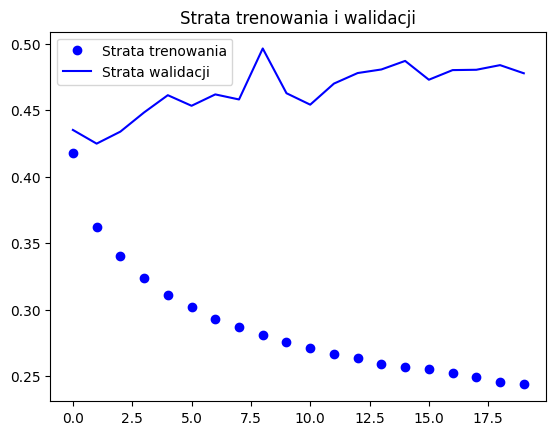

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()


Średni bezwzględny błąd walidacji utrzymuje się na poziomie około 40%, a więc model ten nie jest w stanie pokonać nawet zdefiniowanego wcześniej punktu odniesienia. Dzieje się tak, ponieważ sieć konwolucyjna poszukuje zależności w całych danych szeregu czasowego bez wiedzy o tym, w jakim czasie zaobserwowano przetwarzane wartości (nie zwraca uwagi na to, czy są one zbliżone bardziej do początku, czy do końca analizowanego zbioru). W tym problemie nowsze dane powinny być interpretowane w inny sposób od danych z dalszej przeszłości, a więc sieć konwolucyjna nie jest w stanie wygenerować sensownych wyników. To ograniczenie sieci konwolucyjnych nie jest problematyczne w przypadku zbioru IMDB, ponieważ słowa świadczące o tym, że dana recenzja jest pochlebna lub negatywna, mogą znajdować się w dowolnym miejscu analizowanych zdań.

Sposobem na połączenie szybkości i lekkości sieci konwolucyjnych z braniem pod uwagę kolejności przez sieci rekurencyjne jest zastosowanie jednowymiarowej sieci konwolucyjnej w roli mechanizmu przetwarzającego wstępnie dane kierowane do sieci rekurencyjnej. Rozwiązanie takie sprawdza się szczególnie dobrze podczas pracy z długimi sekwencjami, których długość uniemożliwia ich sensowne przetworzenie za pomocą samych sieci rekurencyjnych (piszę tu o sekwencjach składających się nawet z tysięcy kroków). Sieć konwolucyjna zamieni długą sekwencję wejściową w krótsze sekwencje cech wyższego poziomu, które można następnie skierować do warstwy rekurencyjnej.


Technika ta jest na tyle mało znana, że rzadko spotyka się ją w artykułach naukowych i praktycznych zastosowaniach. Jest jednak na tyle skuteczna, że powinna być bardziej popularna. Spróbujmy użyć jej w celu rozwiązania problemu prognozowania temperatury. Rozwiązanie to pozwala na przetwarzanie o wiele dłuższych sekwencji, a więc możemy przyglądać się danym z dalszej przeszłości poprzez zwiększenie wartości parametru lookback generatora danych lub przyglądać się szeregom czasowym o wyższej rozdzielczości poprzez zmniejszenie wartości parametru step generatora danych. W zaprezentowanym przykładzie zdecydowałem się na zmniejszenie o połowę parametru step, co wydłużyło dwukrotnie analizowane szeregi czasowe (pracujemy z próbkami temperatury odczytywanej w odstępie 30 minut). Ponownie korzystam ze zdefiniowanej wcześniej funkcji generator.

In [15]:
# Wcześniej parametr ten przyjmował wartość równą 6 (1 obserwacja na godzinę).
# Teraz przyjmuje wartość 3 (1 obserwacja na 30 minut).
step = 3
lookback = 720  # Bez zmian.
delay = 144 # Bez zmian.

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

Teraz możemy stworzyć model. Połączymy dwie warstwy Conv1D z warstwą GRU:

In [24]:
import keras
with keras.device('/cpu:0'):
    model = Sequential()
    model.add(layers.Conv1D(32, 5, activation='relu',
                            input_shape=(None, float_data.shape[-1])))
    model.add(layers.MaxPooling1D(3))
    model.add(layers.Conv1D(32, 5, activation='relu'))
    model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.05))
    model.add(layers.Dense(1))

    model.summary()

    model.compile(optimizer=RMSprop(), loss='mae')
    history = model.fit(train_gen,
                                  steps_per_epoch=500,
                                  epochs=20,
                                  validation_data=val_gen,
                                  validation_steps=val_steps)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)              │ (None, None, 32)       │         2,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, None, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, None, 32)       │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,793 (53.88 KB)

 Trainable params: 13,793 (53.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.3640 - val_loss: 0.2904
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.3066 - val_loss: 0.2862
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.2933 - val_loss: 0.2728
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.2855 - val_loss: 0.2745
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.2748 - val_loss: 0.2709
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 0.2704 - val_loss: 0.2720
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 0.2653 - val_loss: 0.2684
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - loss: 0.2599 - val_loss: 0.2740
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 0.2561 - val_loss: 0.2828
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - loss: 0.2502 - val_loss: 0.2774
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - loss: 0.2478 - val_loss: 0.2762
Epoch 12/20
500/500 ━━━━━━━━━━

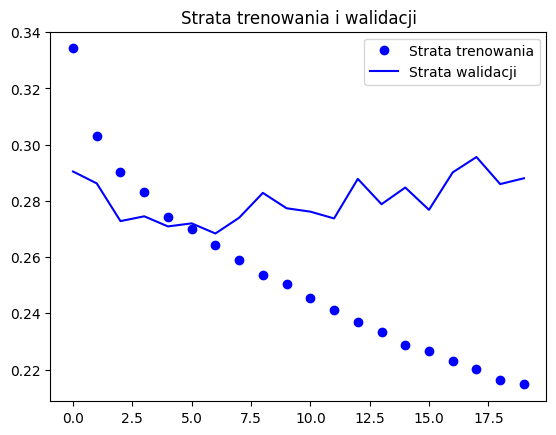

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

Przyglądając się wykresowi straty walidacyjnej, możemy stwierdzić, że taka konfiguracja modelu jest słabsza od samej warstwy GRU poddanej regularyzacji, ale działa znacznie szybciej. Analizuje dwa razy więcej danych, co w tym przypadku nie jest zabiegiem szczególnie przydatnym, ale w innych zbiorach danych może przynieść znaczną poprawę pracy algorytmu.

## Wnioski

Oto wnioski, które należy wynieść z tej części:

* Jednowymiarowe konwolucyjne sieci neuronowe doskonale nadają się do przetwarzania danych szeregów czasowych, tak jak dwuwymiarowe sieci konwolucyjne doskonale nadają się do przetwarzania wzorców zakodowanych w płaszczyznach dwuwymiarowych obrazów. W przypadku niektórych problemów sieci te stanowią szybszą alternatywę sieci rekurencyjnych. Dotyczy to szczególnie zadań związanych z przetwarzaniem języka naturalnego.
* Zwykle jednowymiarowe sieci konwolucyjne mają strukturę przypominającą strukturę ich dwuwymiarowych odpowiedników stosowanych do przetwarzania obrazu: składają się ze stosu warstw Conv1D i MaxPooling1D (na ich końcu stosowane są warstwy wykonujące operacje globalnego sumowania lub spłaszczania).
* •	Używanie rekurencyjnych sieci neuronowych do przetwarzania długich sekwencji wiąże się z dużym wydatkiem obliczeniowym, a jednowymiarowe sieci konwolucyjne wymagają o wiele prostszych obliczeń. W związku z tym warto używać jednowymiarowych sieci konwolucyjnych w roli mechanizmów wstępnie przetwarzających dane przed skierowaniem ich do warstw sieci rekurencyjnej. Takie rozwiązanie skraca analizowaną sekwencję, a warstwy rekurencyjne zajmują się tylko przydatnymi reprezentacjami danych.

Łączenie sieci konwolucyjnych i rekurencyjnych w domyślnym wydaniu z przykładu nie wyszło u mnie dobrze. Wyniki loss są kosmicznie wysokie (w milionach). Ponownie musiałem ustawić rekurencyjny dropout na 0.05, żeby kod pracował poprawnie.